In [2]:
import numpy as np
import pandas as pd

import sqlalchemy

import matplotlib as plt
import matplotlib.pyplot as plt

from common.funcs import read_ticker_from_sql, show_volume, concat_diff, display_diff

In [3]:
df = read_ticker_from_sql('MA2209.ZCE', '20220719')
df.head()

,symbol,date,time,open,high,low,close,volume,open_interest,turnover,last,average,settle,pre_close,pre_settle,pre_open_interest,ask1_price,ask1_volume,bid1_price,bid1_volume
id,,,,,,,,,,,,,,,,,,,,
1,MA2209.ZCE,20220719,21:31:03.000,2327.0,2351.0,2315.0,2344.0,272623,1031645.0,0.0,2344.0,2330.0,0.0,2339.0,2379.0,1120765.0,2345.0,367,2344.0,178
2,MA2209.ZCE,20220719,21:31:04.000,2327.0,2351.0,2315.0,2345.0,272645,1031640.0,0.0,2345.0,2330.0,0.0,2339.0,2379.0,1120765.0,2345.0,361,2344.0,275
3,MA2209.ZCE,20220719,21:31:04.000,2327.0,2351.0,2315.0,2345.0,272678,1031631.0,0.0,2345.0,2330.0,0.0,2339.0,2379.0,1120765.0,2345.0,348,2344.0,284
4,MA2209.ZCE,20220719,21:31:04.000,2327.0,2351.0,2315.0,2344.0,272709,1031616.0,0.0,2344.0,2330.0,0.0,2339.0,2379.0,1120765.0,2345.0,451,2344.0,310
5,MA2209.ZCE,20220719,21:31:05.000,2327.0,2351.0,2315.0,2344.0,272746,1031588.0,0.0,2344.0,2330.0,0.0,2339.0,2379.0,1120765.0,2345.0,419,2344.0,327


In [4]:
df.shape

(7978, 20)

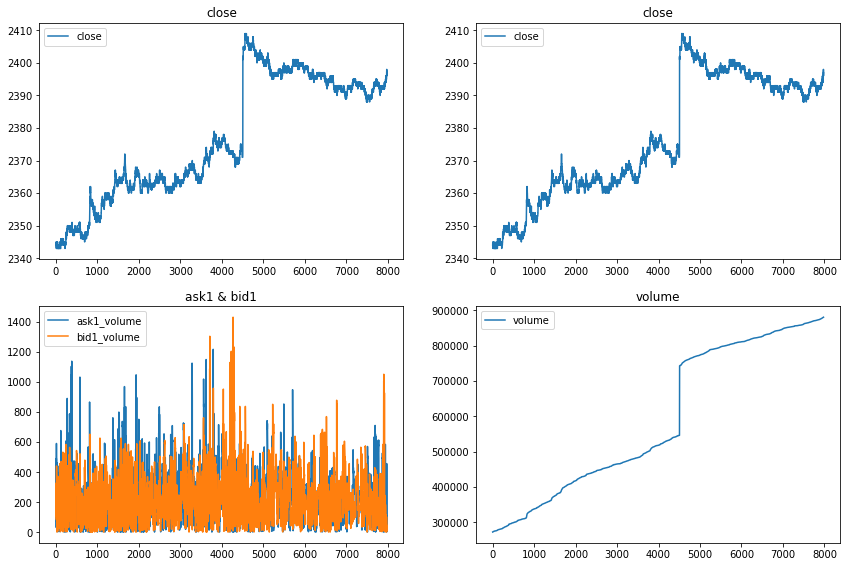

In [5]:
show_volume(df)

In [6]:
# 制作特征集 x, 所有行，指定列
raw_x = df[['open', 'high', 'low', 'close', 'volume', 
            'average', 'ask1_price', 'ask1_volume', 'bid1_price', 'bid1_volume']]
raw_x.head()

,open,high,low,close,volume,average,ask1_price,ask1_volume,bid1_price,bid1_volume
id,,,,,,,,,,
1,2327.0,2351.0,2315.0,2344.0,272623,2330.0,2345.0,367,2344.0,178
2,2327.0,2351.0,2315.0,2345.0,272645,2330.0,2345.0,361,2344.0,275
3,2327.0,2351.0,2315.0,2345.0,272678,2330.0,2345.0,348,2344.0,284
4,2327.0,2351.0,2315.0,2344.0,272709,2330.0,2345.0,451,2344.0,310
5,2327.0,2351.0,2315.0,2344.0,272746,2330.0,2345.0,419,2344.0,327


In [10]:
data_x = raw_x.copy()

# 制作特征集 x, 添加 前1, 3, 5秒的 close, ask1_volume 增量， bid1_volume 增量
columns = ['close', 'ask1_price', 'ask1_volume', 'bid1_price', 'bid1_volume']
data_x = concat_diff(data_x, 2, columns)
data_x = concat_diff(data_x, 6, columns)
# data_x = concat_diff(data_x, 10, columns)
# 取20行观察
data_x = data_x[10:30]
print(data_x.shape)
data_x.head(20)

(20, 20)


,open,high,low,close,volume,average,ask1_price,ask1_volume,bid1_price,bid1_volume,close_2,ask1_price_2,ask1_volume_2,bid1_price_2,bid1_volume_2,close_6,ask1_price_6,ask1_volume_6,bid1_price_6,bid1_volume_6
id,,,,,,,,,,,,,,,,,,,,
11,2327.0,2351.0,2315.0,2344.0,273495,2330.0,2344.0,422,2343.0,202,0.0,0.0,-69.0,0.0,110.0,0.0,-1.0,3.0,-1.0,-125.0
12,2327.0,2351.0,2315.0,2344.0,273731,2330.0,2345.0,591,2344.0,162,1.0,1.0,100.0,1.0,78.0,0.0,0.0,172.0,0.0,-131.0
13,2327.0,2351.0,2315.0,2344.0,273817,2330.0,2345.0,301,2344.0,125,0.0,1.0,-121.0,1.0,-77.0,0.0,1.0,-57.0,1.0,-15.0
14,2327.0,2351.0,2315.0,2344.0,273845,2330.0,2345.0,286,2344.0,102,0.0,0.0,-305.0,0.0,-60.0,1.0,2.0,255.0,2.0,-177.0
15,2327.0,2351.0,2315.0,2344.0,273992,2330.0,2344.0,74,2343.0,441,0.0,-1.0,-227.0,-1.0,316.0,0.0,0.0,-417.0,0.0,349.0
16,2327.0,2351.0,2315.0,2343.0,274022,2330.0,2344.0,93,2343.0,271,-1.0,-1.0,-193.0,-1.0,169.0,0.0,0.0,-398.0,0.0,187.0
17,2327.0,2351.0,2315.0,2343.0,274031,2330.0,2344.0,140,2343.0,86,-1.0,0.0,66.0,0.0,-355.0,-1.0,0.0,-282.0,0.0,-116.0
18,2327.0,2351.0,2315.0,2343.0,274065,2330.0,2344.0,129,2343.0,73,0.0,0.0,36.0,0.0,-198.0,-1.0,-1.0,-462.0,-1.0,-89.0
19,2327.0,2351.0,2315.0,2343.0,274096,2330.0,2344.0,114,2343.0,84,0.0,0.0,-26.0,0.0,-2.0,-1.0,-1.0,-187.0,-1.0,-41.0


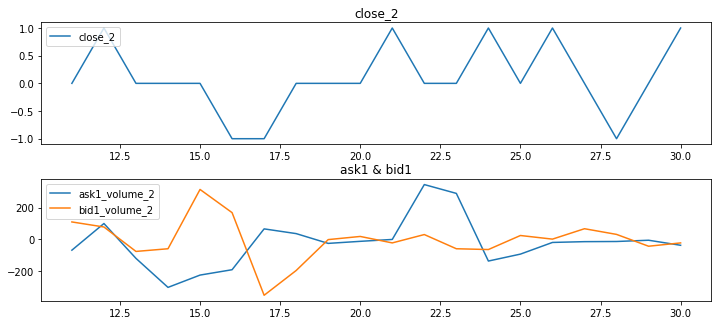

In [11]:
display_diff(data_x, 2)

In [13]:
# 制作标注集 y -- 如果 close_10 > 0 则为1(上涨），如果 close_10 <= 0 则为0(没上涨)
data_y = data_x['close_2'].apply(lambda x: 1 if x > 0 else 0)
data_y.columns = ['up_2']
data_y.head(20)

id
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    0
23    0
24    1
25    0
26    1
27    0
28    0
29    0
30    1
Name: close_2, dtype: int64

In [14]:
data_y.shape

(20,)

In [15]:
data_y.size

20

In [16]:
data_x.describe()

,open,high,low,close,volume,average,ask1_price,ask1_volume,bid1_price,bid1_volume,close_2,ask1_price_2,ask1_volume_2,bid1_price_2,bid1_volume_2,close_6,ask1_price_6,ask1_volume_6,bid1_price_6,bid1_volume_6
count,20.0,20.0,20.0,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2327.0,2351.0,2315.0,2343.800000,274142.300000,2330.0,2344.600000,265.700000,2343.550000,112.550000,0.100000,0.100000,-22.000000,0.100000,-3.150000,0.200000,0.250000,-23.300000,0.250000,-42.000000
std,0.0,0.0,0.0,0.615587,274.231193,0.0,0.502625,139.357586,0.510418,98.360494,0.640723,0.552506,152.745747,0.552506,133.620545,0.833509,0.850696,248.990192,0.850696,143.710235
min,2327.0,2351.0,2315.0,2343.000000,273495.000000,2330.0,2344.000000,74.000000,2343.000000,1.000000,-1.000000,-1.000000,-305.000000,-1.000000,-355.000000,-1.000000,-1.000000,-462.000000,-1.000000,-380.000000
25%,2327.0,2351.0,2315.0,2343.000000,274014.500000,2330.0,2344.000000,125.750000,2343.000000,60.000000,0.000000,0.000000,-100.750000,0.000000,-60.000000,0.000000,0.000000,-175.750000,0.000000,-118.250000
50%,2327.0,2351.0,2315.0,2344.000000,274113.000000,2330.0,2345.000000,290.000000,2344.000000,87.000000,0.000000,0.000000,-17.500000,0.000000,-0.500000,0.000000,0.000000,-27.000000,0.000000,-37.500000
75%,2327.0,2351.0,2315.0,2344.000000,274387.750000,2330.0,2345.000000,313.750000,2344.000000,122.000000,0.250000,0.000000,8.250000,0.000000,40.000000,1.000000,1.000000,190.750000,1.000000,-6.000000
max,2327.0,2351.0,2315.0,2345.000000,274491.000000,2330.0,2345.000000,591.000000,2344.000000,441.000000,1.000000,1.000000,347.000000,1.000000,316.000000,2.000000,2.000000,370.000000,2.000000,349.000000


<AxesSubplot:xlabel='id'>

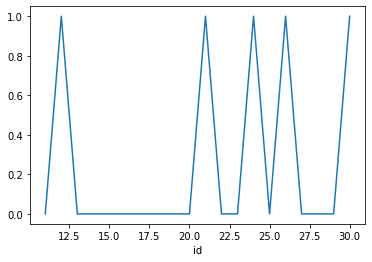

In [17]:
# 检查 data_y 的分布
data_y.plot()